<a href="https://colab.research.google.com/github/N1sChaLLL/ML_LAB/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [ ]:
A = pd.read_excel('Lab Session Data.xlsx', usecols = [1,2,3])
print(A.head())
A.shape #dimension of A

   Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27             6                 2
3           19             1                 2
4           24             4                 2


(10, 3)

In [ ]:
B = pd.read_excel('Lab Session Data.xlsx',usecols =[4])
B.head()

,Payment (Rs)
0,386
1,289
2,393
3,110
4,280


In [ ]:
C = np.linalg.pinv(A)
X = np.dot(C,B)
print(X)

[[ 1.]
 [55.]
 [18.]]


# New Section

In [ ]:
# rank of A
print(np.linalg.matrix_rank(A))

3


In [ ]:
# q2 pseudo inverse of a matrix X
print(np.linalg.pinv(X))
# For prices
print(np.linalg.pinv(C))


[[0.00029851 0.01641791 0.00537313]]
[[20.  6.  2.]
 [16.  3.  6.]
 [27.  6.  2.]
 [19.  1.  2.]
 [24.  4.  2.]
 [22.  1.  5.]
 [15.  4.  2.]
 [18.  4.  2.]
 [21.  1.  4.]
 [16.  2.  4.]]


In [ ]:
#mark customers Q3
myexcel = pd.read_excel('Lab Session Data.xlsx')
myexcel['Status'] = myexcel['Payment (Rs)'].apply(lambda x: "RICH" if x > 200 else "POOR")
myexcel.head()

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Candy,Mango,Milk,Status
0,C_1,20,6,2,386,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,55.0,18.0,RICH
1,C_2,16,3,6,289,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RICH
2,C_3,27,6,2,393,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RICH
3,C_4,19,1,2,110,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POOR
4,C_5,24,4,2,280,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RICH


In [ ]:
#irctc mean and variance
irctc = pd.read_excel('Lab Session Data.xlsx',sheet_name ='IRCTC Stock Price')
irctc.head()
mean = st.mean(irctc['Price'])
print(mean)
var = st.variance(irctc['Price'])
print(var)

1560.663453815261
58732.365352539186


In [ ]:
#Q4 Wednesday Statisitics
irctcdf = pd.read_excel("Lab Session Data.xlsx",sheet_name='IRCTC Stock Price')
irctcdf.head()
df1 = irctcdf.query("(Day == 'Wed')")
# newwedavg = df1['Price'].sum()/len(df1)
newwedavg = st.mean(df1['Price'])
newwedvar = st.variance(df1['Price'])
print("The wednesday average is ",newwedavg)
print("The wednesday variance is ",newwedvar)
print("The population mean is ",mean)
print("The population variation is",var)

The wednesday average is  1550.706
The wednesday variance is  57939.550167346926
The population mean is  1560.663453815261
The population variation is 58732.365352539186


In [ ]:
#April Mean and statisitics
aprildf = irctcdf.query("(Month == 'Apr')")
aprilmean = st.mean(aprildf['Price'])
print("The april mean is ",aprilmean)
aprilvar = st.variance(aprildf['Price'])
print("The april variance is ",aprilvar)
print("The population mean is ",mean)
print("The population variation is",var)



The april mean is  1698.9526315789474
The april variance is  4877.621798245614
The population mean is  1560.663453815261
The population variation is 58732.365352539186


In [ ]:
#Loss over the stock
lossdf = irctc['Chg%']
loss = 0
profit = 0
for i in range(len(lossdf)):
  if(lossdf.loc[i]<0):
    loss+=1
  else:
    profit+=1
probability_loss = loss/(profit + loss)
print(probability_loss*100,"% Is the probability of loss")

49.79919678714859 % Is the probability of loss


In [ ]:
#WEDNESDAY PROFIT CALCULATION Q4
wedprof = df1['Chg%']
prof=0
loss=0
for i in range(len(wedprof)):
  if(wedprof.iloc[i]>0):
    prof+=1
  else:
    loss+=1
probability_prof = prof/(prof + loss)
print(probability_prof*100,"% Is the probability of profit on wednesday")


42.0 % Is the probability of profit on wednesday


In [ ]:
#Conditional Probability of making profit is prob of wed and prob of getting wednesday
numberofwed = irctcdf["Day"]
wed = 0
for i in range(len(numberofwed)):
  if(numberofwed.iloc[i]=="Wed"):
    wed+=1
prob_wed = wed/len(numberofwed)
condprob = prob_wed * probability_prof
print("The conditional probability of making profit on wednesday is ",condprob)

The conditional probability of making profit on wednesday is  0.08433734939759036


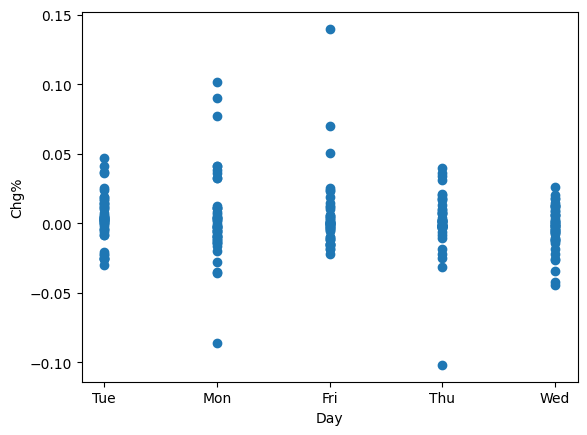

In [ ]:
#Scatter Plot using matplotlib
import matplotlib.pyplot as plt
weddata = irctc[['Day','Chg%']]
plt.scatter(weddata['Day'],weddata['Chg%'])
plt.xlabel("Day")
plt.ylabel("Chg%")
plt.show()


In [ ]:
#Q5
thy = pd.read_excel("Lab Session Data.xlsx",sheet_name="thyroid0387_UCI")
thy.head()
thy.info() #Datatype of the attributes
thy.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   object
 14  tumor   

In [ ]:
#Range of integer data
df1 = thy['Record ID']
print("Range of Record ID : ",df1.max() - df1.min())
df2 = thy['age']
print("Range of age is : ",df2.max() - df2.min())


Range of Record ID :  29318022
Range of age is :  65525


In [ ]:
#Presence of null values
thy.isnull().sum()

,0
Record ID,0
age,0
sex,0
on thyroxine,0
query on thyroxine,0
on antithyroid medication,0
sick,0
pregnant,0
thyroid surgery,0
I131 treatment,0


In [ ]:
#Find outliers of record
thyrec = thy["Record ID"]
thyage = thy["age"]
perc = np.percentile(thyrec,25)
# print(perc)
perc1 = np.percentile(thyrec,75)
# print(perc1)
IQR = perc -perc1
upperthreshold = perc1 + 1.5*IQR
lowerthreshold = perc - 1.5*IQR
outlierrec = []
for i in range(len(thyrec)):
  if(thyrec.iloc[i] > upperthreshold or thyrec.iloc[i] < lowerthreshold):
      outlierrec.append(thyrec.iloc[i])
print("The outliers in Record ID are : ",outlierrec)
meanrec = st.mean(thyrec)
print("The mean of the age is : ",meanrec)
varrec = st.variance(thyrec)
print("The variance of the age is : ",varrec)
stdrec = varrec**0.5
print("The standard deviation of the age is : ",stdrec)

The outliers in Record ID are :  [840801013, 840801014, 840801042, 840803046, 840803047, 840803048, 840803068, 840807019, 840808060, 840808073, 840810016, 840813022, 840813060, 840813068, 840814014, 840814057, 840815016, 840815020, 840815067, 840815068, 840815069, 840816001, 840816002, 840816003, 840816004, 840816005, 840816006, 840816007, 840816008, 840816009, 840816010, 840816011, 840816013, 840816014, 840816022, 840816025, 840816028, 840816029, 840816046, 840816047, 840816049, 840816052, 840816060, 840816061, 840816063, 840816069, 840816070, 840816071, 840816072, 840816076, 840816077, 840816078, 840816093, 840816095, 840816097, 840817001, 840817002, 840817003, 840817004, 840817006, 840817008, 840817009, 840817010, 840817012, 840817028, 840817038, 840817056, 840817058, 840817059, 840817060, 840817061, 840817062, 840817064, 840817065, 840820001, 840820002, 840820003, 840820004, 840820009, 840820014, 840820020, 840820021, 840820022, 840820027, 840820047, 840820052, 840821009, 840821010

In [ ]:
newperc = np.percentile(thyage,25)
newperc1 = np.percentile(thyage,75)
newIQR = newperc - newperc1
upthres = newperc1 + 1.5*newIQR
lowthres = newperc - 1.5*newIQR
outliersage = []
for i in range(len(thyage)):
  if(thyage.iloc[i]>upthres or thyage.iloc[i]<lowthres):
    outliersage.append(thyage.iloc[i])
print("The outliers of the Age is :",outliersage)
meanage = st.mean(thyage)
print("The mean of the age is : ",meanage)
varage = st.variance(thyage)
print("The variance of the age is : ",varage)
stdage = varage**0.5
print("The standard deviation of the age is : ",stdage)

The outliers of the Age is : [29, 29, 41, 36, 32, 60, 77, 28, 28, 28, 54, 42, 51, 51, 37, 16, 54, 43, 63, 36, 40, 40, 40, 77, 77, 77, 77, 51, 75, 56, 42, 85, 41, 71, 67, 67, 51, 51, 28, 55, 32, 61, 46, 41, 44, 51, 29, 41, 82, 64, 70, 54, 33, 59, 44, 44, 44, 53, 41, 52, 59, 49, 44, 44, 46, 35, 56, 54, 54, 54, 54, 61, 40, 48, 64, 27, 69, 69, 60, 27, 27, 51, 76, 52, 73, 68, 66, 66, 30, 30, 30, 28, 88, 38, 66, 58, 21, 56, 60, 38, 38, 49, 27, 70, 70, 45, 83, 28, 44, 62, 51, 77, 60, 30, 30, 25, 86, 83, 83, 75, 75, 72, 72, 28, 55, 55, 41, 41, 27, 45, 14, 40, 28, 68, 40, 15, 68, 61, 63, 63, 60, 77, 48, 39, 39, 42, 15, 41, 62, 26, 63, 58, 55, 77, 43, 73, 20, 61, 49, 80, 90, 72, 72, 55, 29, 23, 15, 40, 18, 18, 18, 30, 63, 13, 35, 78, 76, 24, 37, 20, 27, 62, 24, 68, 38, 60, 49, 63, 58, 58, 58, 35, 35, 59, 71, 81, 92, 92, 53, 57, 57, 57, 28, 74, 74, 74, 75, 54, 41, 41, 62, 33, 33, 33, 33, 45, 62, 62, 24, 9, 44, 28, 28, 28, 41, 64, 25, 60, 73, 71, 40, 72, 36, 40, 47, 47, 70, 17, 25, 72, 70, 76, 71,

In [ ]:
#A8
thynew = pd.read_excel("Lab Session Data.xlsx",sheet_name="thyroid0387_UCI",usecols = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,21,23,25,27])
# thynew.head()
# thynew.info()
f11=0
f01 = 0
f00 = 0
f10 = 0
vec1 = thynew.iloc[0]
vec2 = thynew.iloc[1]
for i in range(len((vec1))):
    if((vec1.iloc[i]=='t' and vec2.iloc[i]=='t')):
       f11+=1
    elif(vec1.iloc[i]=='f' and vec2.iloc[i]=='f'):
      f00+=1
    elif(vec1.iloc[i]=='f' and vec2.iloc[i]=='t'):
      f01+=1
    else:
      f10+=1
jc = f11/(f01+f10+f11)
smc = (f11+f00)/(f01+f10+f11+f00)
print("The Jaccard Coefficient is : ",jc)
print("The SMC is : ",smc)




The Jaccard Coefficient is :  0.2
The SMC is :  0.8095238095238095


In [ ]:
#A9
newvec1 = thy.iloc[0]
newvec2 = thy.iloc[1]
len1 = 0
len2 = 0
prodsum = 0
for i in range(len(newvec1)):
  if(newvec1.iloc[i]=='f'):
    newvec1.iloc[i]=0
  else:
    newvec1.iloc[i]=1
  if(newvec2.iloc[i]=='f'):
    newvec2.iloc[i]=0
  else:
    newvec2.iloc[i]=1
  len1+= newvec1.iloc[i]**2
  len2+= newvec2.iloc[i]**2
  prodsum+=newvec1.iloc[i]*newvec2.iloc[i]
len1 = len1**0.5
len2 = len2**0.5
cosine_similarity = f11/(len1*len2)
print("The cosine similarity is : ",cosine_similarity)


The cosine similarity is :  0.07412493166611013


<ipython-input-72-a1e5160456df>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newvec1.iloc[i]=1
<ipython-input-72-a1e5160456df>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newvec2.iloc[i]=1
<ipython-input-72-a1e5160456df>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newvec1.iloc[i]=0
<ipython-input-72-a1e5160456df>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

In [ ]:
#A10
#heatmap plot
for i in range(20):
  f11=0
  f01 = 0
  f00 = 0
  f10 = 0
  vec1 = thynew.iloc[i]
  vec2 = thynew.iloc[i+1]
  for j in range(len((vec1))):
    if((vec1.iloc[j]=='t' and vec2.iloc[j]=='t')):
       f11+=1
    elif(vec1.iloc[j]=='f' and vec2.iloc[j]=='f'):
      f00+=1
    elif(vec1.iloc[j]=='f' and vec2.iloc[j]=='t'):
      f01+=1
    else:
      f10+=1
    jc = f11/(f01+f10+f11)
    smc = (f11+f00)/(f01+f10+f11+f00)
    print("The Jaccard Coefficient is : ",jc)
    print("The SMC is : ",smc)
    len1 = 0
    len2 = 0
    prodsum = 0
    for k in range(len(vec1)):
      if(vec1.iloc[k]=='f'):
        vec1.iloc[k]=0
      else:
        vec1.iloc[k]=1
      if(vec2.iloc[k]=='f'):
        vec2.iloc[k]=0
      else:
        vec2.iloc[k]=1
      len1+= vec1.iloc[k]**2
      len2+= vec2.iloc[k]**2
      prodsum+=vec1.iloc[k]*vec2.iloc[k]
    len1 = len1**0.5
    len2 = len2**0.5
    cosine_similarity = f11/(len1*len2)
    print("The cosine similarity is : ",cosine_similarity)




The Jaccard Coefficient is :  0.0
The SMC is :  0.0
The cosine similarity is :  0.0
The Jaccard Coefficient is :  0.0
The SMC is :  0.0
The cosine similarity is :  0.0
The Jaccard Coefficient is :  0.0
The SMC is :  0.0
The cosine similarity is :  0.0
The Jaccard Coefficient is :  0.0
The SMC is :  0.0
The cosine similarity is :  0.0
The Jaccard Coefficient is :  0.0
The SMC is :  0.0
The cosine similarity is :  0.0
The Jaccard Coefficient is :  0.0
The SMC is :  0.0
The cosine similarity is :  0.0
The Jaccard Coefficient is :  0.0
The SMC is :  0.0
The cosine similarity is :  0.0
The Jaccard Coefficient is :  0.0
The SMC is :  0.0
The cosine similarity is :  0.0
The Jaccard Coefficient is :  0.0
The SMC is :  0.0
The cosine similarity is :  0.0
The Jaccard Coefficient is :  0.0
The SMC is :  0.0
The cosine similarity is :  0.0
The Jaccard Coefficient is :  0.0
The SMC is :  0.0
The cosine similarity is :  0.0
The Jaccard Coefficient is :  0.0
The SMC is :  0.0
The cosine similarity is